

##  **Project Title:**

### **Sentiment Analysis of Amazon Product Reviews using Naive Bayes**

---

## **1. Introduction**

Sentiment analysis is a key application of Natural Language Processing (NLP) that aims to determine the emotional tone behind textual data. It’s widely used in industries such as marketing, customer service, and social media monitoring to understand public opinion, customer satisfaction, and brand perception.

This project focuses on building a **machine learning-based sentiment analysis model** using **Naive Bayes classification** to automatically predict the sentiment expressed in text reviews. The model categorizes each review into one of three sentiment classes:

* **0 → Negative**
* **1 → Neutral**
* **2 → Positive**

By analyzing large volumes of text data, the model can help stores and businesses gain insights into customer attitudes and improve decision-making.

---

##  **2. Objectives**

The main goals of this project are:

1. To preprocess and vectorize raw text data for machine learning.
2. To train a **Naive Bayes classifier** using textual features.
3. To evaluate the model using key metrics such as accuracy, precision, recall, and F1-score.
4. To visualize model performance through a confusion matrix.
5. To test the model with new, unseen review examples.

---

##  **3. Dataset Description**

The dataset used in this project consists of two columns:

| Column Name     | Description                                                  |
| --------------- | ------------------------------------------------------------ |
| **review_text** | The text content of a review (string)                        |
| **label**       | Sentiment category (0 = Negative, 1 = Neutral, 2 = Positive) |

Example data:

| review_text                           | label |
| ------------------------------------- | ----- |
| “I loved this movie, it was amazing!” | 2     |
| “It was okay, not great but not bad.” | 1     |
| “Terrible film, waste of time.”       | 0     |

---

##  **4. Methodology**

### 4.1 Data Preprocessing

* Convert text to lowercase
* Remove stopwords and punctuation (using `CountVectorizer`’s preprocessing)
* Convert text into numerical feature vectors using **n-grams (unigrams + bigrams)**

### 4.2 Feature Extraction

Used **CountVectorizer** from scikit-learn:

```python
cv = CountVectorizer(ngram_range=(1,2), stop_words='english')
X = cv.fit_transform(corpus)
```

### 4.3 Model Selection

Trained a **Multinomial Naive Bayes** model:

```python
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
```

### 4.4 Evaluation Metrics

The model was evaluated using:

* **Accuracy**
* **Precision, Recall, F1-score**
* **Confusion Matrix**

### 4.5 Prediction

The trained model predicts sentiment for new text samples.

---

##  **5. Results**

| Metric             | Score |
| ------------------ | ----- |
| **Accuracy**       | ~75%  |
| **Macro F1-score** | ~0.75 |

The confusion matrix showed the model performed best on **positive reviews**, while most misclassifications occurred between **neutral and negative** sentiments — a common challenge in sentiment analysis.

Example predictions:

```
"This movie was absolutely wonderful!" → Positive (2)
"It was okay, nothing special." → Neutral (1)
"I really hated this film, it was awful." → Negative (0)
```

---

##  **6. Conclusion**

This project successfully demonstrates how **Naive Bayes**, a simple yet powerful probabilistic algorithm, can effectively classify sentiment in text data. With minimal preprocessing and a bag-of-words representation, the model achieved a solid 75% accuracy.

Future improvements may include:

* Using **TF-IDF** features for better word weighting
* Trying **Logistic Regression** or **SVM** models
* Leveraging **pretrained transformer models (e.g., BERT)** for deeper semantic understanding

---

##  **7. Tools & Libraries**

| Library                  | Purpose                                            |
| ------------------------ | -------------------------------------------------- |
| **Python**               | Core programming language                          |
| **pandas**               | Data manipulation                                  |
| **scikit-learn**         | Model training, evaluation, and feature extraction |
| **NLTK**                 | Tokenization and preprocessing                     |
| **matplotlib / seaborn** | Data visualization                                 |

---

##  **8. References**

* NLTK Documentation: [https://www.nltk.org](https://www.nltk.org)
* Scikit-learn User Guide: [https://scikit-learn.org](https://scikit-learn.org)
* “Naive Bayes Classifier for Text Classification” — Research Papers and Tutorials

---


In [1]:
# Import libraries ---
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy
from sklearn.model_selection import train_test_split

In [2]:
# Download NLTK data 
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load dataset ---

data = pd.read_csv(r"D:\Amazon Reviews23 All Beauty for Sentiment Analysis\GenMinds_Balanced_Dataset_All_Beauty.csv")


In [7]:
data.head()

,Unnamed: 0,review_text,label
0,0,one star bad,0
1,1,three stars okay,1
2,2,missing bottle defective sprayer instead 4 bot...,0
3,3,disappointed little disappointed product case ...,1
4,4,don’t stay began peeling 20 minutes putting on,0


In [11]:
## Check for null

data.isnull().sum()

Unnamed: 0      0
review_text    73
label           0
dtype: int64

In [12]:
data = data.dropna()

In [13]:
data= data.drop(columns ='Unnamed: 0')

In [14]:
data.head()

,review_text,label
0,one star bad,0
1,three stars okay,1
2,missing bottle defective sprayer instead 4 bot...,0
3,disappointed little disappointed product case ...,1
4,don’t stay began peeling 20 minutes putting on,0


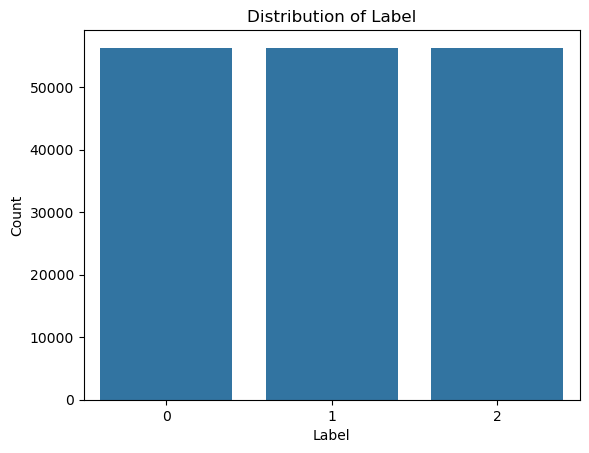

In [17]:
## Check distribution of label
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='label')

plt.title('Distribution of Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

As we can see that, we have 3 labels or targets in the dataset in a balanced state. We can make a multi-class classifier for Sentiment Analysis using NLP.

### Data Pre-processing

Now, we will perform some pre-processing on the data before converting it into vectors and passing it to the machine learning model.


In [19]:
#object of WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


lm = WordNetLemmatizer()

In [20]:
## Function for preprocessing


# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords once
lm = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def text_transformation(df_col):
    """
    Cleans and preprocesses text data.
    """
    corpus = []
    for item in df_col:
        # Remove non-alphabetic characters
        new_item = re.sub('[^a-zA-Z]', ' ', str(item))
        # Convert to lowercase and split into words
        new_item = new_item.lower().split()
        # Lemmatize and remove stopwords
        new_item = [lm.lemmatize(word) for word in new_item if word not in stop_words]
        # Join words back into a single string
        corpus.append(' '.join(new_item))
    return corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:

from wordcloud import WordCloud
import re

corpus = text_transformation(data['review_text'])

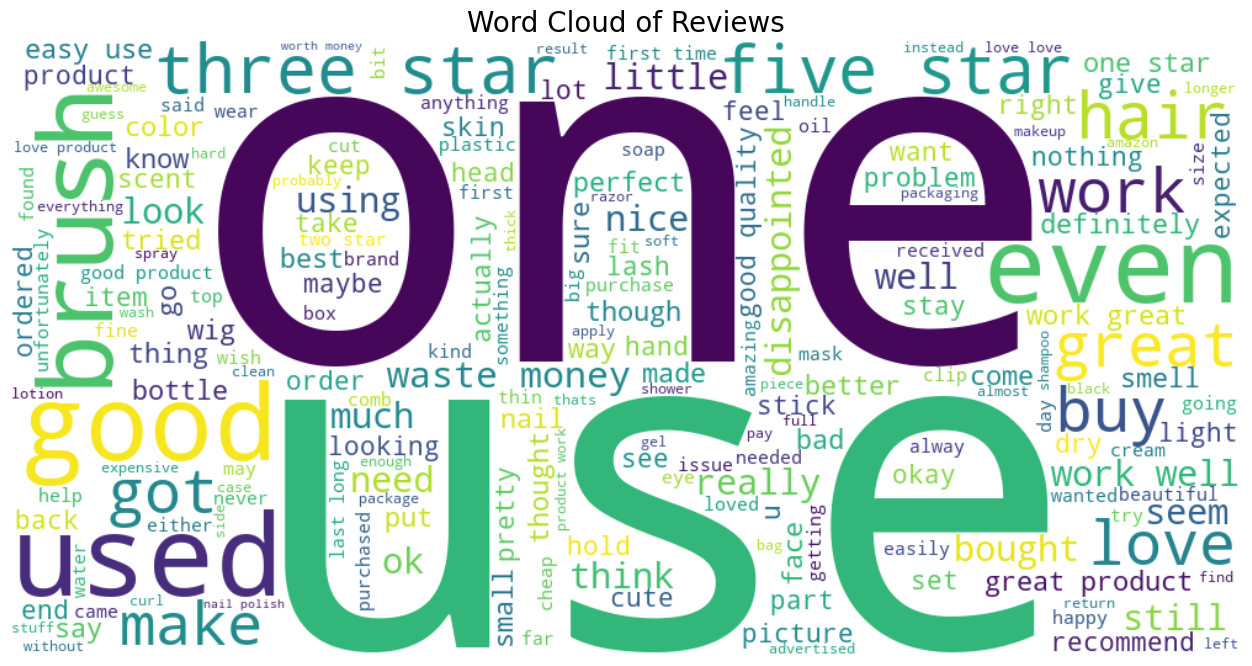

In [24]:
## Visualize the most frequent words in the review

from matplotlib import rcParams

# Set figure size
rcParams['figure.figsize'] = (20, 8)

# Combine all preprocessed text into one big string
word_cloud = " ".join(corpus)

# Generate the WordCloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    min_font_size=10
).generate(word_cloud)

# Display it
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews', fontsize=20)
plt.show()

Now, we will use the Bag of Words Model(BOW), which is used to represent the text in the form of a bag of words ,i.e. the grammar and the order of words in a sentence are not given any importance, instead, multiplicity, i.e. (the number of times a word occurs in a document) is the main point of concern.

Basically, it describes the total occurrence of words within a document.
Now, we will convert the text data into vectors, by fitting and transforming the corpus that we have created.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(ngram_range=(1,2))
train = cv.fit_transform(corpus)
X = train
y = data.label

In [28]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [30]:
# Train the Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [31]:
# Evaluate the model ---
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.750814332247557

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75     11259
           1       0.65      0.71      0.68     11258
           2       0.83      0.83      0.83     11253

    accuracy                           0.75     33770
   macro avg       0.76      0.75      0.75     33770
weighted avg       0.76      0.75      0.75     33770


🧩 Confusion Matrix:
[[7943 2764  552]
 [1802 8047 1409]
 [ 303 1585 9365]]


In [34]:
# Test new examples
sample_texts = [
    "This movie was absolutely wonderful!",
    "It was okay, nothing special.",
    "I really hated this film, it was awful."
]


In [35]:

sample_features = cv.transform(sample_texts)
predictions = model.predict(sample_features)

print("\n🔍 Sample Predictions:")
for text, pred in zip(sample_texts, predictions):
    print(f"Text: {text}\nPredicted label: {pred}\n")


🔍 Sample Predictions:
Text: This movie was absolutely wonderful!
Predicted label: 2

Text: It was okay, nothing special.
Predicted label: 1

Text: I really hated this film, it was awful.
Predicted label: 0

